In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'/Users/gangashaji/Downloads/iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
#no null values

<Axes: >

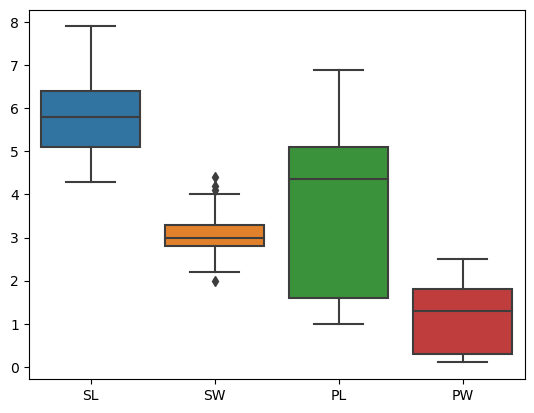

In [10]:
sns.boxplot(data[['SL','SW','PL','PW']])

In [11]:
#outliers need not be handled

In [12]:
x=data.drop('Classification',axis=1)

In [13]:
y=data['Classification']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clt=dt_clf.fit(x_train,y_train)

In [17]:
y_pred=dt_clf.predict(x_test)

In [18]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [20]:
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred,average='weighted'))
print('recall_score=',recall_score(y_test,y_pred,average='weighted'))
print('f1_score=',f1_score(y_test,y_pred,average='weighted'))

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


In [21]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [22]:
from sklearn.model_selection import KFold

In [23]:
kfold_validator=KFold(10)

In [24]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(dt_clf,x,y,cv=kfold_validator)
cv_result

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.93333333, 1.        ])

In [25]:
np.mean(cv_result)

0.96

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
y_predictions=rf_clf.predict(x_test)

In [28]:
print('Accuracy is',accuracy_score(y_test,y_predictions))

Accuracy is 1.0


In [29]:
confusion_matrix(y_test,y_predictions)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [30]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(rf_clf,x,y,cv=kfold_validator)
cv_result

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.8       , 1.        ])

In [31]:
np.mean(cv_result)

0.9466666666666667

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metric_k=[]
neighbors=np.arange(3,15)

In [34]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

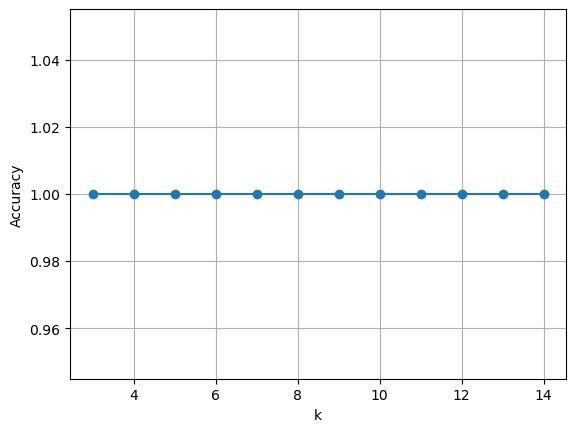

In [35]:
plt.plot(neighbors,metric_k,'o-')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.grid()

In [36]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)#max accuracy is for almost all values of k

In [37]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [38]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(classifier,x,y,cv=kfold_validator)
cv_result

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.8       , 0.93333333])

In [39]:
np.mean(cv_result)

0.9333333333333333

# SVM

In [40]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [41]:
y_prediction=svmclf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_prediction))

Accuracy is 1.0


In [43]:
confusion_matrix(y_test,y_prediction)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [44]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(svmclf,x,y,cv=kfold_validator)
cv_result

array([1.        , 1.        , 1.        , 1.        , 0.86666667,
       0.93333333, 1.        , 1.        , 0.86666667, 0.93333333])

In [45]:
np.mean(cv_result)

0.96

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial', solver ='lbfgs')
model=lr.fit(x_train,y_train)

In [47]:
y_predictions=model.predict(x_test)

In [48]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))

Accuracy= 1.0
Precision= 1.0
recall_score= 1.0
f1_score= 1.0


In [49]:
confusion_matrix(y_test,y_predictions)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [50]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(model,x,y,cv=kfold_validator)
cv_result

/Users/gangashaji/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gangashaji/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.86666667, 0.93333333])

In [51]:
np.mean(cv_result)

0.9466666666666667